## df Analys Project: Bike Sharing Datasets
 * Name: Chandra MS
 * Email: Chandramalik1908@gmail.com

Dataset characteristics
===	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Business Question
1. How is the trend of Bike Sharing daily and weekly?
2. How is the effect of season to usage of Bike Sharing?
3. 

## Import dfsets
In this problems, we have two level of Bike Sharing dfsets. First dfsets is hour, which is dfsets that recap hourly activity of Bike sharing and the Second dfsets is daily, which is dfsest that recap daily activity of Bike sharing. Since daily dara are contruct base on hourly dfsets, in this analysis I just used hour dfsets.

In [1]:
## Import Data Hour
import pandas as pd

#work_directory = 'D:/DataScience_Project/Bike Sharing Dataset'
df_hour = pd.read_csv('D:/DataScience_Project/Bike Sharing Dataset/hour.csv')
df_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Data Wrangling
in this part we will work with:
1. Handling Irrelevant features (variables)
2. Handling Missing Value
3. Normalization and Standardization Data

In [2]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The datasets we used have 17 coloumns with 17379 rows, coloumn type are listed above.

In [3]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The datasets does not contain any missing value as show on result above.

In [4]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The variables like weathersit, temp, atemp, hum, and windspeed have been standardize from the start.

## Exploratory df Analysis (EDA)
in this process we aim to get general condition of df, such as Outlier and Multicollinearity.
we can get those information using visualisation or a test:
1. **Outlier**, to detect this problems one of methode is using Box-plot Visualization.
2. **Multicollinearity**, to detct this problems we can used heatmap of Correlation or VIF test.
3. **Feature Engginering**, the goals is to generate a feature (varible) that helping in analysis process.

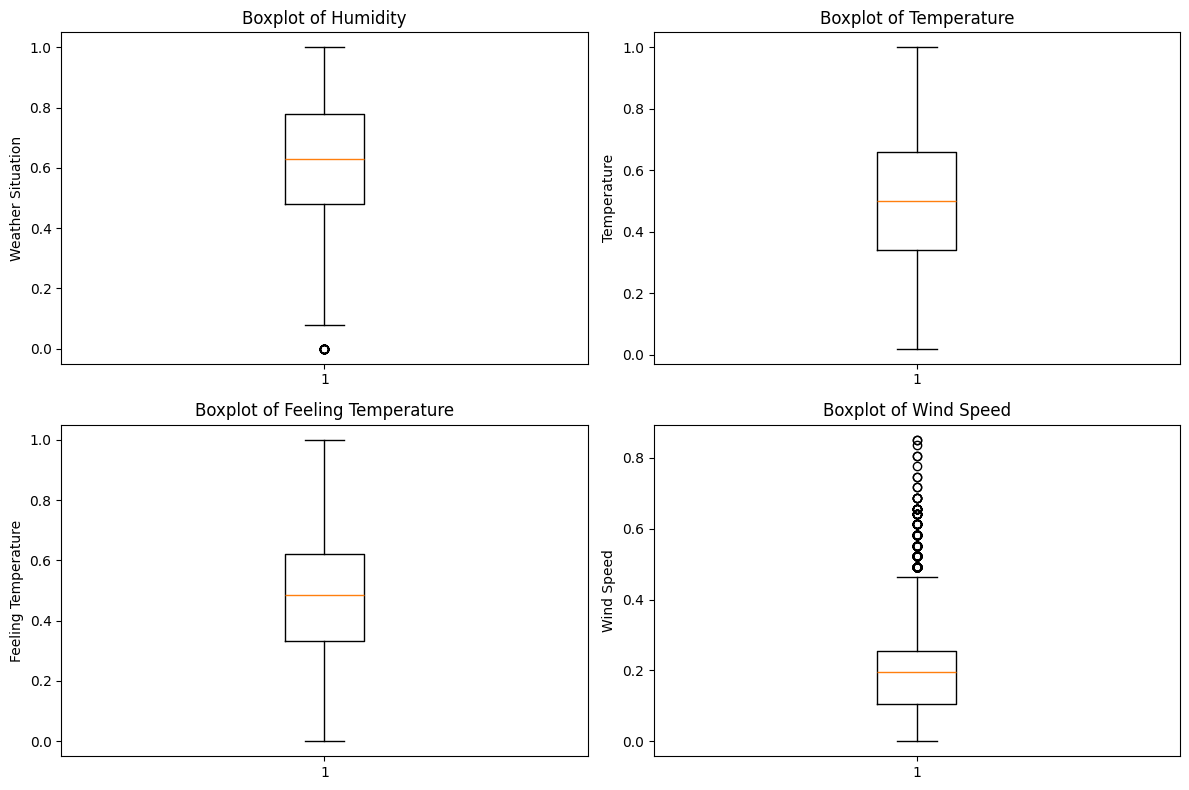

In [5]:
## Outlier detect using Box-plot.
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
plt.figure(figsize=(12, 8))

# Boxplot for 'hum'
plt.subplot(2, 2, 1)
plt.boxplot(df_hour['hum'])
plt.title('Boxplot of Humidity')
plt.ylabel('Weather Situation')

# Boxplot for 'temp'
plt.subplot(2, 2, 2)
plt.boxplot(df_hour['temp'])
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')

# Boxplot for 'atemp'
plt.subplot(2, 2, 3)
plt.boxplot(df_hour['atemp'])
plt.title('Boxplot of Feeling Temperature')
plt.ylabel('Feeling Temperature')

# Boxplot for 'windspeed'
plt.subplot(2, 2, 4)
plt.boxplot(df_hour['windspeed'])
plt.title('Boxplot of Wind Speed')
plt.ylabel('Wind Speed')

# Show the plots
plt.tight_layout()
plt.show()


Boxplot above shows that some variable appear to have outlier such as humidity and windspeed, but We don't want to process outlier at this point since it may give some interesting discovery in this analysis.

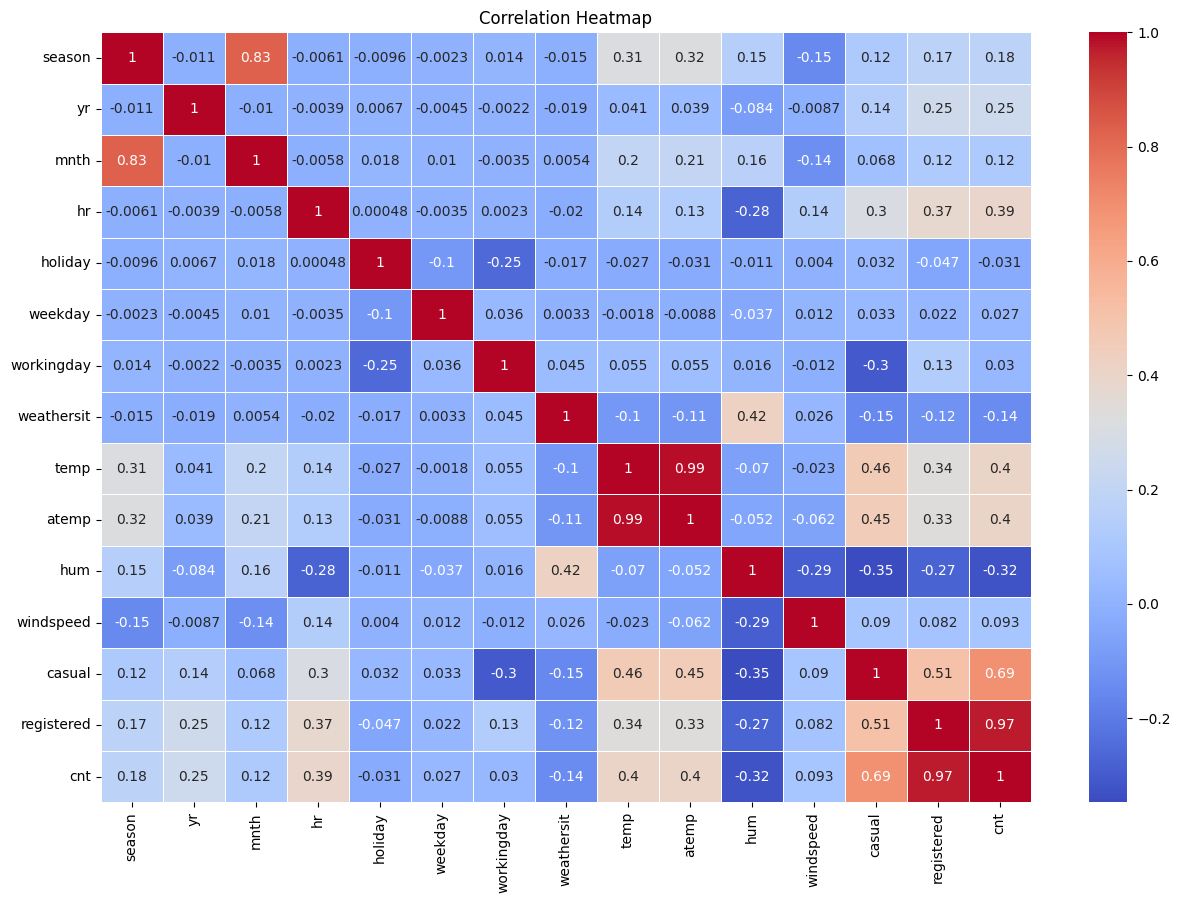

In [6]:
## Multicollinearity using correlation
# Drop the datetime variable (assuming the column name is 'dteday') 
res_corr = df_hour.drop(columns=['dteday','instant']).corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(res_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


according to heatmap correaltion above, we knew some variables are highly correlated with over 0.5 point, for example:
1. **season** - **month**
2. **temp** - **atemp**
3. **cnt** - **registered** - **casual**

varibales that highly correlated, seem to have multicollinearity issues.

In [7]:
## Feature Engginering
## Generate Day name and Season name
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['day_name'] = df_hour['dteday'].dt.day_name()


# Define a mapping for the season numbers to season names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_hour['season_name'] = df_hour['season'].map(season_mapping)
df_hour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name,season_name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,Spring


In [8]:
## Daily Activities
import numpy as np
# Define aggregation functions to make a daily activity
agg_funcs = {
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum',
    'windspeed': 'mean',  # You can change this to 'median' or 'mode' if needed
    'temp': 'mean',       # You can change this to 'median' or 'mode' if needed
    'atemp': 'mean',      # You can change this to 'median' or 'mode' if needed
    'hum': 'mean',  # Mode
    'day_name': lambda x: x.mode()[0],
    'season_name':lambda x: x.mode()[0]
}

# Aggregate the data by 'dteday'
df_daily = df_hour.groupby('dteday').agg(agg_funcs).reset_index()

# Display the first few rows of the aggregated daily data
df_daily.head()


,dteday,registered,casual,cnt,windspeed,temp,atemp,hum,day_name,season_name
0,2011-01-01,654,331,985,0.160446,0.344167,0.363625,0.805833,Saturday,Spring
1,2011-01-02,670,131,801,0.248539,0.363478,0.353739,0.696087,Sunday,Spring
2,2011-01-03,1229,120,1349,0.248309,0.196364,0.189405,0.437273,Monday,Spring
3,2011-01-04,1454,108,1562,0.160296,0.200000,0.212122,0.590435,Tuesday,Spring
4,2011-01-05,1518,82,1600,0.186900,0.226957,0.229270,0.436957,Wednesday,Spring


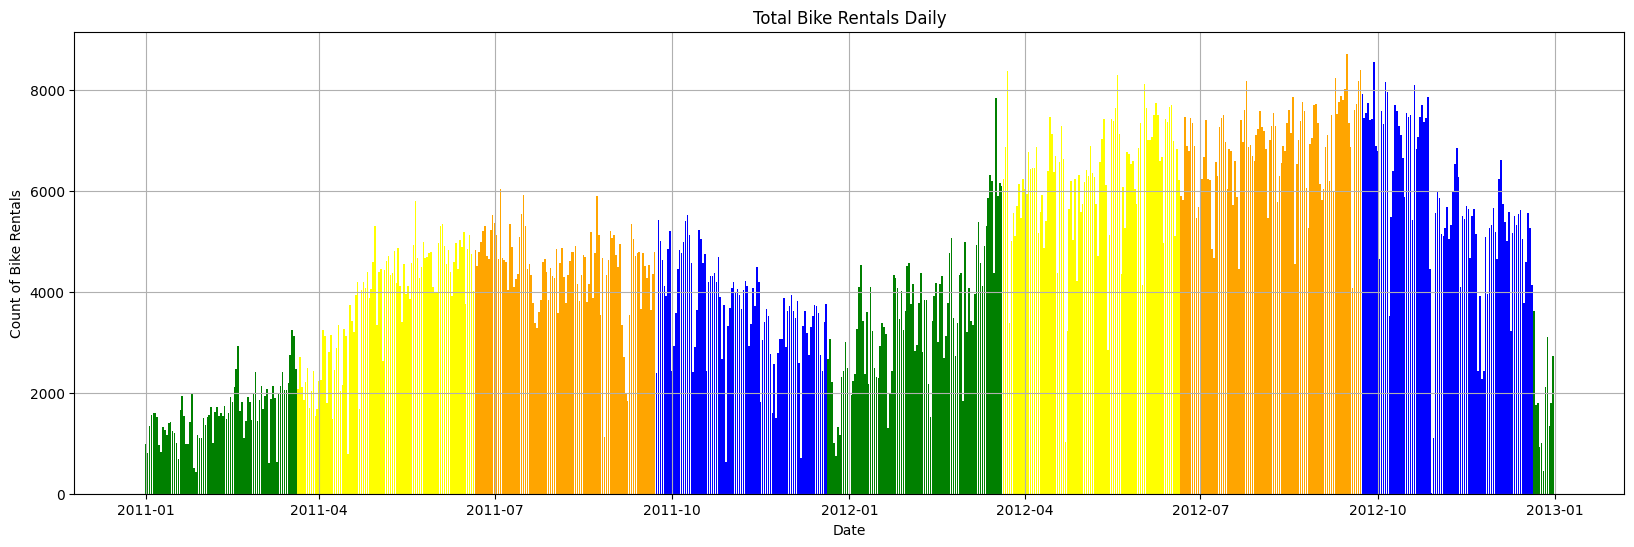

In [9]:
# Define a color mapping for the seasons
color_mapping = {
    'Spring': 'green',
    'Summer': 'yellow',
    'Fall': 'orange',
    'Winter': 'blue'
}

# Map the colors to the season names
colors = df_daily['season_name'].map(color_mapping)

# Create a time series plot for the 'cnt' column
plt.figure(figsize=(20, 6))
plt.bar(df_daily['dteday'], df_daily['cnt'], color=colors)
plt.title('Total Bike Rentals Daily')
plt.xlabel('Date')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)
plt.show()


Plot above show seasonal trend of Bike sharing activity, as ilustrate above the activity during winter season tend to decrease each yaer and then follow increase during spring, summer and fall. It also show increase in total user from year 2011 to 2012.

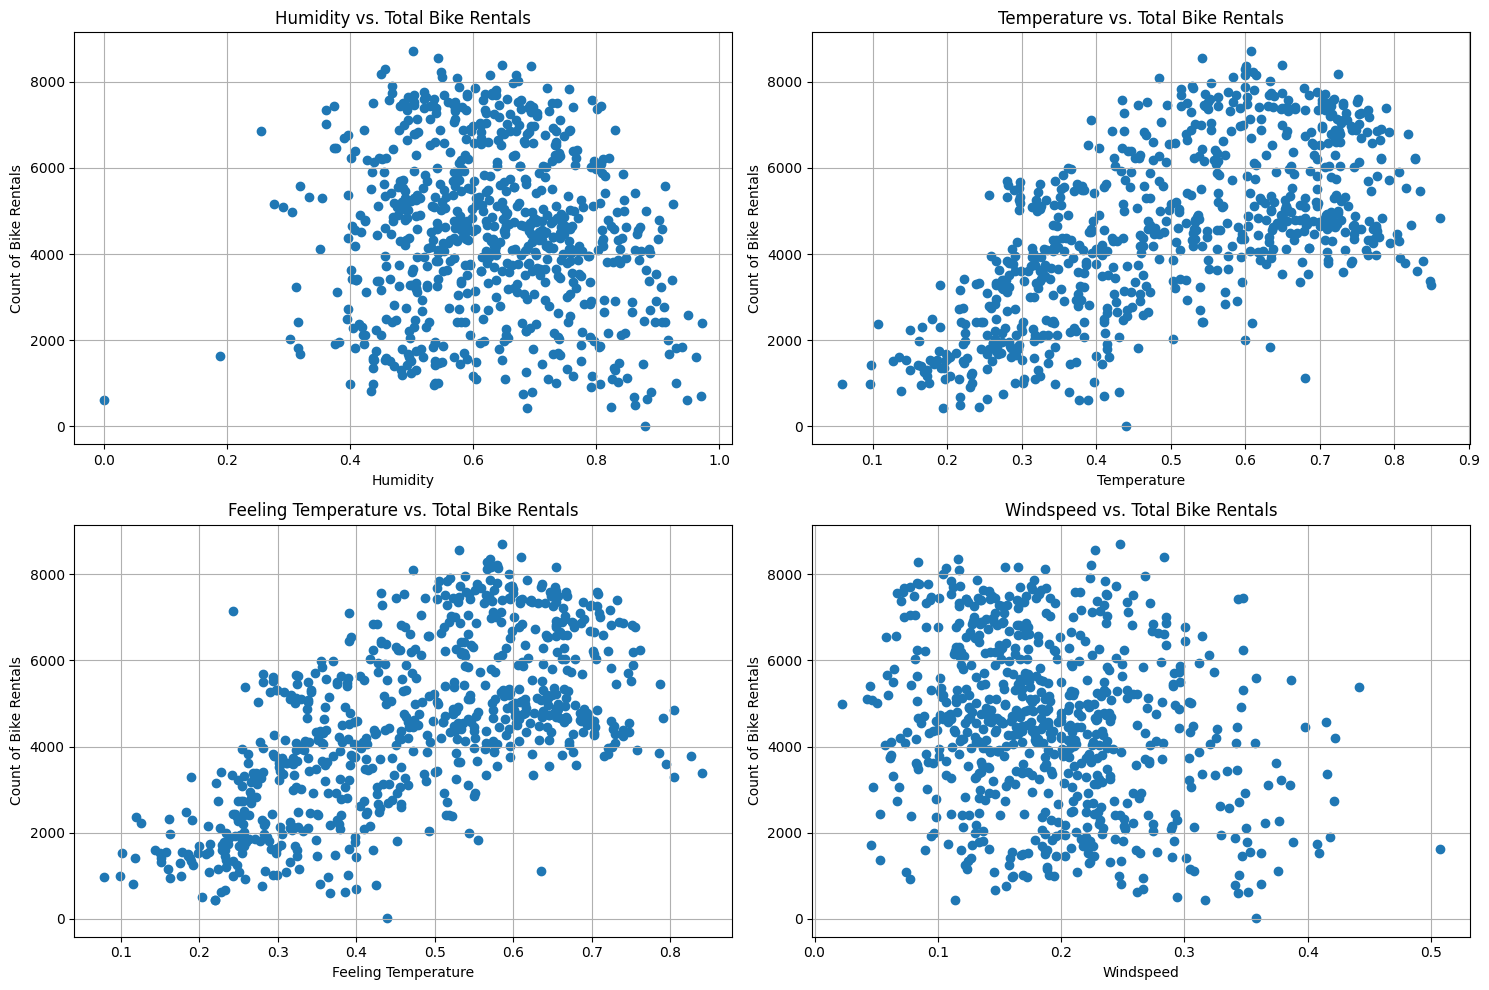

In [10]:
plt.figure(figsize=(15, 10))

# Scatter plot for humidity vs. total bike rentals
plt.subplot(2, 2, 1)
plt.scatter(df_daily['hum'], df_daily['cnt'])
plt.title('Humidity vs. Total Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)

# Scatter plot for temperature vs. total bike rentals
plt.subplot(2, 2, 2)
plt.scatter(df_daily['temp'], df_daily['cnt'])
plt.title('Temperature vs. Total Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)

# Scatter plot for feeling temperature vs. total bike rentals
plt.subplot(2, 2, 3)
plt.scatter(df_daily['atemp'], df_daily['cnt'])
plt.title('Feeling Temperature vs. Total Bike Rentals')
plt.xlabel('Feeling Temperature')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)

# Scatter plot for windspeed vs. total bike rentals
plt.subplot(2, 2, 4)
plt.scatter(df_daily['windspeed'], df_daily['cnt'])
plt.title('Windspeed vs. Total Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)

plt.tight_layout()
plt.show()


Scatter plot above show that user are consider about Temperature, Feeling Temperature, Windspeed and Humidity, that we can state:
- User are morelikely to rent a bike when Humidity between 0.4 to 0.8, and outside that range are less favorable.
- Temperature and Feeling Temperature seem to have parabolic pattern where the peak rent is in range 0.5 to 0.7.
- Windspeed showing that user likely to rent when it is low at level below 0.3.

In [11]:
# Group by 'Day_of_Week' and sum the 'Total Casual', 'Total Registered', and 'Total Count'
df_weekly = df_daily.groupby('day_name').agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekly['Day_of_Week'] = pd.Categorical(df_weekly['day_name'], categories=days_order, ordered=True)
df_weekly = df_weekly.sort_values('Day_of_Week')

# Display the DataFrame to check
df_weekly

df_hourly = df_hour.groupby('hr').agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()
df_hourly.columns = ['Hour','casual','registered','cnt']
df_hourly.head()

,Hour,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941


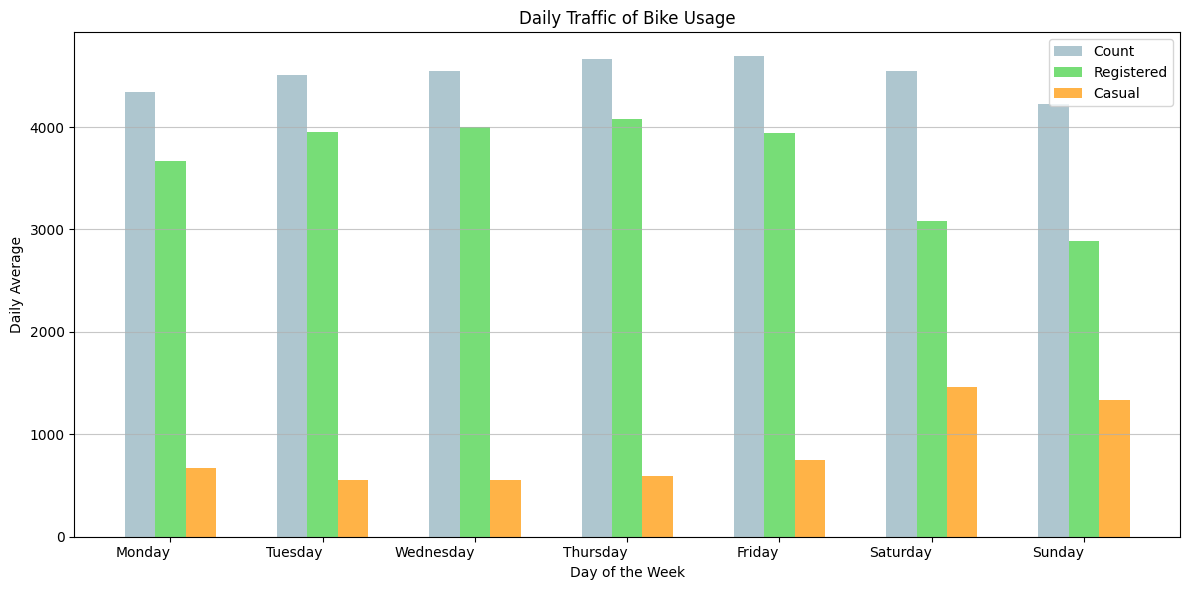

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the positions for each bar group
bar_width = 0.2
positions = np.arange(len(df_weekly['day_name']))

# Create the grouped bar plot
plt.figure(figsize=(12, 6))

plt.bar(positions, df_weekly['cnt'], width=bar_width, label='Count', color='#AEC6CF')
plt.bar(positions + bar_width, df_weekly['registered'], width=bar_width, label='Registered', color='#77DD77')
plt.bar(positions + 2*bar_width, df_weekly['casual'], width=bar_width, label='Casual', color='#FFB347')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Daily Average')
plt.title('Daily Traffic of Bike Usage')
plt.xticks(positions + bar_width, df_weekly['day_name'], rotation=0, ha='right')
plt.legend()
plt.grid(axis='y',alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


From daily barplot above we know the habbit of user:
- Total users are stable at above 4000 rent per day.
- Registered users are more likely people that used Bike as transportain for daily activities, this statement support with stable average users in weekday and drop on weekend.
- Casual users are more likely  people that used Bike as Relaxation, leisure, or Sport activities, it shows with high number in weekend with over 1000 rented during weekend and only less than 1000 used on weekdays. 

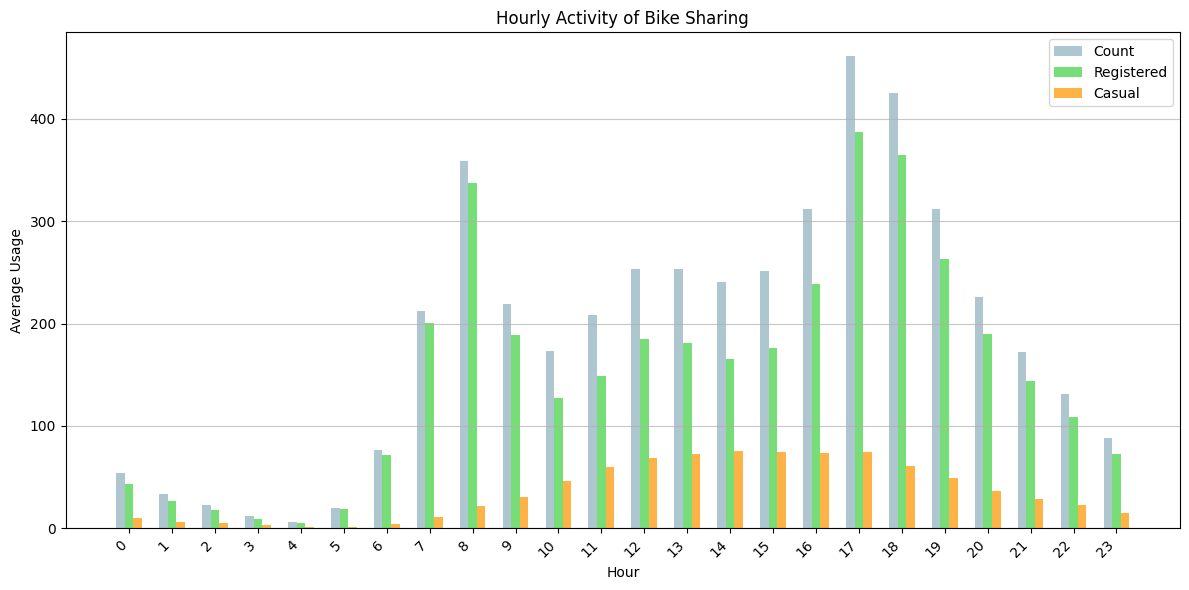

In [13]:
# Define the positions for each bar group
bar_width = 0.2
positions = np.arange(len(df_hourly['Hour']))

# Create the grouped bar plot
plt.figure(figsize=(12, 6))

# Total Count bar
plt.bar(positions, df_hourly['cnt'], width=bar_width, label='Count', color='#AEC6CF')
plt.bar(positions + bar_width, df_hourly['registered'], width=bar_width, label='Registered', color='#77DD77')
plt.bar(positions + 2*bar_width, df_hourly['casual'], width=bar_width, label='Casual', color='#FFB347')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Average Usage')
plt.title('Hourly Activity of Bike Sharing')
plt.xticks(positions + bar_width, df_hourly['Hour'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y',alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Hourly barplot above tell us about:
- Register users are likely work in office as it shown by number of traffict at busy hours (8am, 5pm,6pm).
- Casual users are likely people that used bike for having fun it shows from the pattern that increase on daytime.

## Advance Analysis - Clustering

c:\Users\Chama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


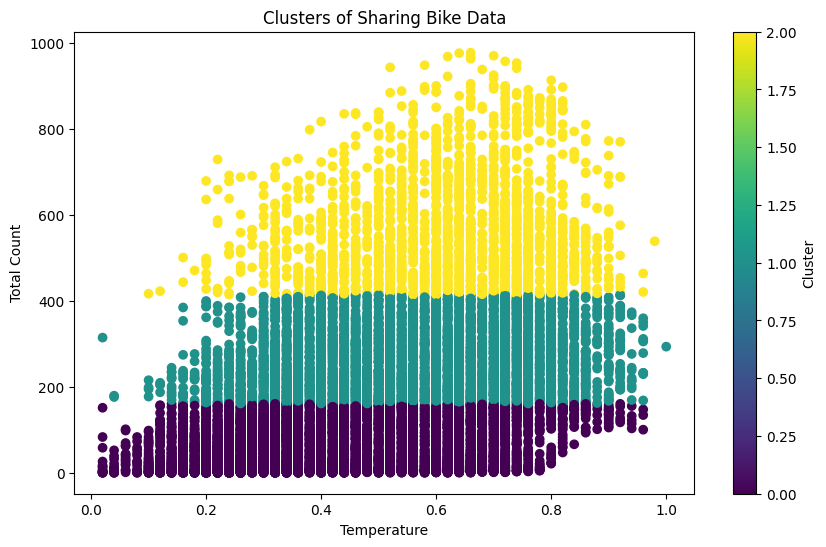

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select the features you want to use for clustering
features = df_hour[['atemp', 'hum', 'windspeed', 'cnt']]

# Since the data is already normalized, we skip the standardization step
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
df_hour['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_hour['temp'], df_hour['cnt'], c=df_hour['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Total Count')
plt.title('Clusters of Sharing Bike Data')
plt.colorbar(label='Cluster')
plt.show()


1. ##### Cluster Distribution:
* **Cluster 0 (Purple)**: This cluster represents users who tend to use bikes less frequently and in lower temperatures. The total count of bike usage is relatively low.
* **Cluster 1 (Green)**: Users in this cluster show moderate bike usage across a range of temperatures. They represent a middle ground between low and high usage.
* **Cluster 2 (Yellow)**: This cluster includes users who use bikes more frequently, especially in higher temperatures. The total count of bike usage is significantly higher in this cluster.

2. ##### Temperature Influence:
- There is a clear trend that higher temperatures correlate with higher bike usage. Users in Cluster 2 (yellow) are more active in warmer conditions, indicating that temperature is a significant factor influencing bike usage.

3. ##### Usage Patterns:
- **Low Usage (Cluster 0)**: Users in this cluster might be occasional riders or those who prefer biking in cooler weather.
- **Moderate Usage (Cluster 1)**: These users have a balanced usage pattern, possibly indicating regular but not intensive use.
- **High Usage (Cluster 2)**: These are likely frequent riders who prefer biking in warmer weather, possibly for commuting or regular exercise.
4. ##### Operational Insights
- Resource Allocation: More bikes should be available during warmer periods to cater to the high-usage cluster.
Targeted Marketing: Promotions and incentives can be tailored for each cluster. For example, encouraging Cluster 0 users to ride more frequently or providing special offers during cooler weather.